In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 4*(np.pi**2) # AU^3 / yr^2 / M_sun
a0 = 1 # in AU
M = 1 # in Msun

#### Setup Functions

In [2]:
def rk4_step(f, x, t, dt):
    # a single rk4 step as defined in class
    k1 = f(t, x) * dt
    k2 = dt * f(t + 0.5*dt, x + 0.5*k1)
    k3 = dt * f(t + 0.5*dt, x + 0.5*k2)
    k4 = dt * f(t + dt, x + k3)
    return x + 1/6*(k1 + 2*k2 + 2*k3 + k4)

In [3]:
def initialize_particle(a0, e0):
    # initial conditions for the particle (given in the problem)
    rp = a0 * (1 - e0)
    vp = np.sqrt(G*M / a0) * np.sqrt((1 + e0) / (1 - e0))
    return np.array([0, rp, -vp, 0])

def rdot(t, v):
    # time derivative of the position vector (just velocity)
    return v

def vdot(t, r):
    # time derivative of the velocity vector (gravitational acceleration)
    r_norm = np.linalg.norm(r)
    return -G*M / r_norm**3 * r

def rdot_vdot(t, vec):
    # package the two time derivatives to operate on the phase space vector
    r, v = vec[:2], vec[2:]
    return np.concatenate([rdot(t, v), vdot(t, r)])

def E(vec):
    # compute the energy of the particle
    r, v = vec[:2], vec[2:] # unpack the phase space vector
    return 0.5 * np.linalg.norm(v)**2 - G*M / np.linalg.norm(r) # kinetic + potential energy

In [4]:
def integrate_orbit(N, tmin=0, tmax=1, a0=a0, e0=0, method=rk4_step):
    # integrate a particle over an orbit using a given method

    # define time grid t and dt
    dt = (tmax - tmin) / int(N)
    t = np.linspace(tmin, tmax, int(N)+1)

    # define vector to use for integration. Easiest to use a phase space vector, where the first
    # two values are position and the second two are velocity
    vec = np.zeros((4, len(t)))
    vec[:,0] = initialize_particle(a0, e0)

    # set up an empty energy array
    Es = np.zeros(len(t))
    Es[0] = E(vec[:,0])

    for i in range(1, len(t)):
        # carry out the integration, updating the phase space vector and the energy at each step
        vec[:,i] = method(rdot_vdot, vec[:,i-1], t[i-1], dt)
        Es[i] = E(vec[:,i])

    return t, vec, Es

#### Part 1 - RK4 on Circular Orbit

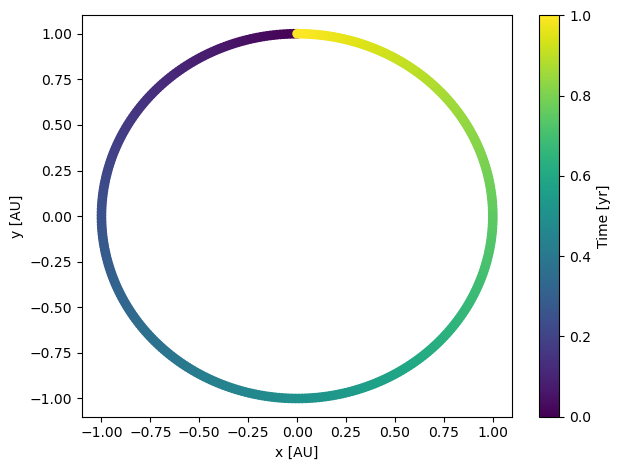

In [5]:
# Plot one orbit to visualize the particle's motion
t, vec, Es = integrate_orbit(365.25, e0=0)

# shade the points by time
plt.scatter(vec[0], vec[1], c=t, cmap='viridis')
plt.colorbar(label='Time [yr]')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.tight_layout()

Text(0, 0.5, 'Relative Error in Position')

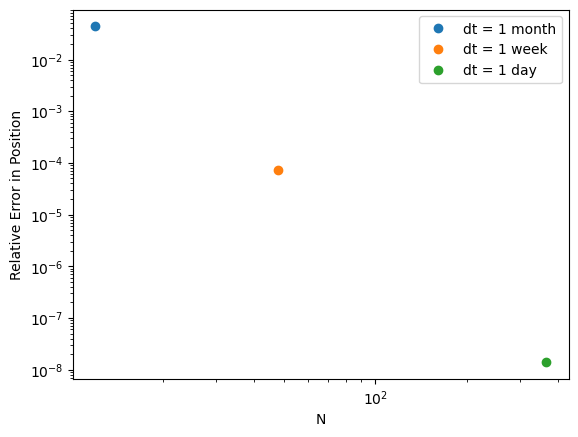

In [6]:
# try out the integration for a time step of 1 month, 1 week, and 1 day
Ns = [12, 48, 365.25]
periods = ['month', 'week', 'day']
for i, N in enumerate(Ns):
    ti, veci, _ = integrate_orbit(N, e0=0)

    # calculate the relative error in the final position
    # in this case, calculate the distance between the initial and final positions
    rel_err = np.linalg.norm(veci[:2,0]-veci[:2,-1])
    plt.loglog(N, rel_err, 'o', label=f'dt = 1 {periods[i]}')

plt.legend()
plt.xlabel('N')
plt.ylabel('Relative Error in Position')

Text(0, 0.5, 'Relative Error in Position')

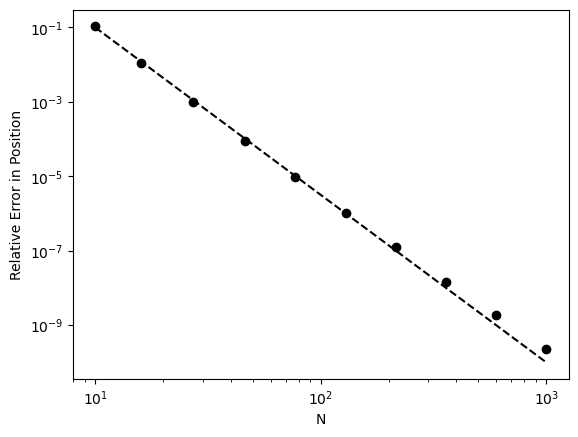

In [7]:
# try out the integration for a much larger number of N values to see the trend more clearly
Ns_fine = np.logspace(1, 3, 10, dtype=int)
for i, N in enumerate(Ns_fine):
    ti, veci, _ = integrate_orbit(N, e0=0)
    rel_err = np.linalg.norm(veci[:2,0]-veci[:2,-1])
    plt.loglog(N, rel_err, 'o', c='k')

plt.plot([1e1, 1e3], [1e-1, 1e-10], 'k--', label='1e-10 error')
plt.xlabel('N')
plt.ylabel('Relative Error in Position')

Especially from the second plot, we can clearly see that as we increase the number of steps, N, the error in the final position compared to the initial position after 1 period goes down. In particular, the plotted line has a slope of approximately -4, which matches up with our expectations that RK4, as a 4th order method, should have errors which go down with the number of steps to the power of -4 (or the step size to the 4th power).

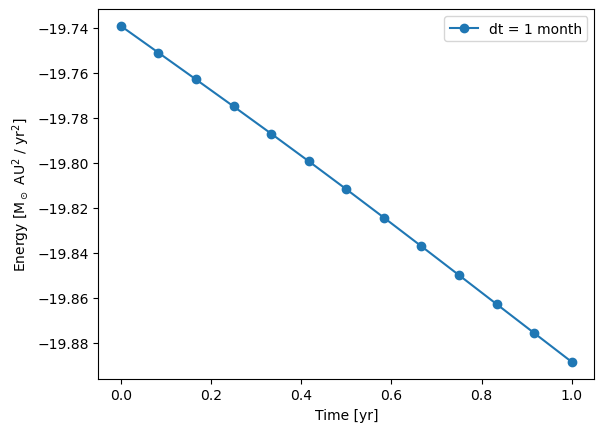

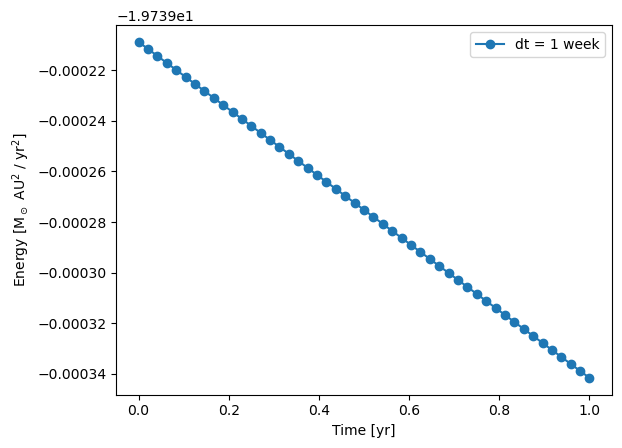

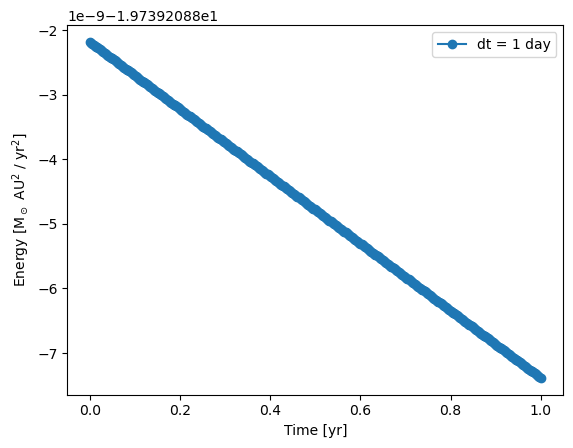

In [8]:
# plot the energies over time for each method
for i, N in enumerate(Ns):
    plt.figure()
    ti, vec, Ei = integrate_orbit(N, e0=0)
    plt.plot(ti, Ei, 'o-', label=f'dt = 1 {periods[i]}')

    plt.xlabel('Time [yr]')
    plt.ylabel(r'Energy [M$_\odot$ AU$^2$ / yr$^2$]')
    plt.legend()

We can see that none of the method completely conserve energy - the energy seems to decrease over time. That being said, the smaller step sizes conserve energy much better, as expected given the increased computational cost.

#### Part 2 - RK4 on Elliptical Orbit

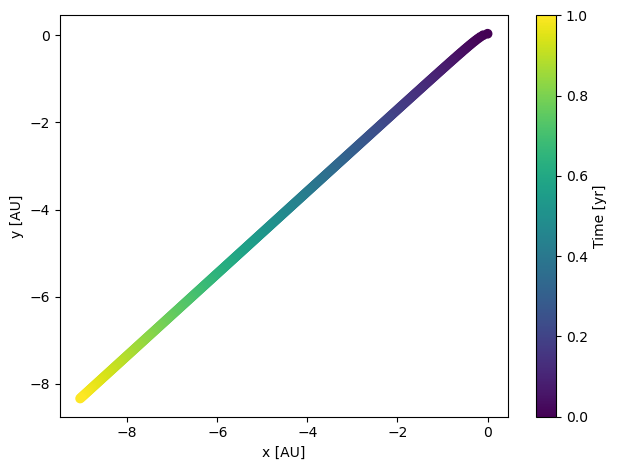

In [9]:
# Plot one orbit to visualize the particle's motion
t, vec, Es = integrate_orbit(365.25, e0=0.96)

# shade the points by time
plt.scatter(vec[0], vec[1], c=t, cmap='viridis')
plt.colorbar(label='Time [yr]')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.tight_layout()

Text(0, 0.5, 'Relative Error in Position')

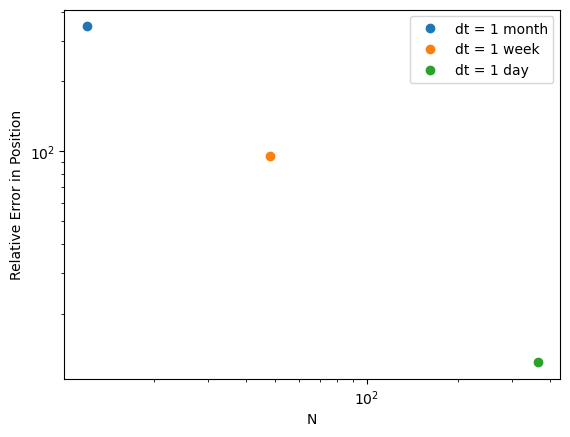

In [10]:
# try out the integration for a time step of 1 month, 1 week, and 1 day
Ns = [12, 48, 365.25]
periods = ['month', 'week', 'day']
for i, N in enumerate(Ns):
    ti, veci, _ = integrate_orbit(N, e0=0.96)

    # calculate the relative error in the final position
    # in this case, calculate the distance between the initial and final positions
    rel_err = np.linalg.norm(veci[:2,0]-veci[:2,-1])
    plt.loglog(N, rel_err, 'o', label=f'dt = 1 {periods[i]}')

plt.legend()
plt.xlabel('N')
plt.ylabel('Relative Error in Position')

Especially from the second plot, we can clearly see that as we increase the number of steps, N, the error in the final position compared to the initial position after 1 period goes down. In particular, the plotted line has a slope of approximately -4, which matches up with our expectations that RK4, as a 4th order method, should have errors which go down with the number of steps to the power of -4 (or the step size to the 4th power).

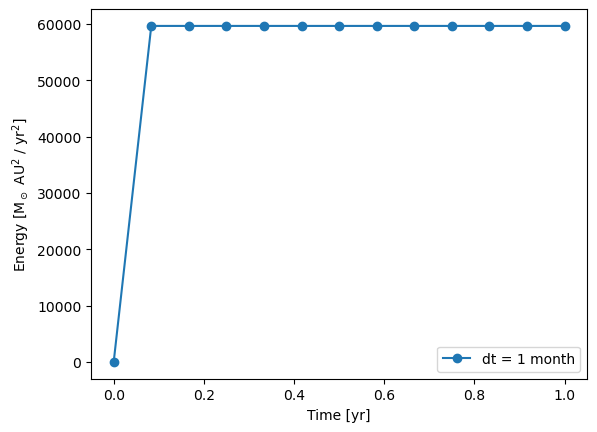

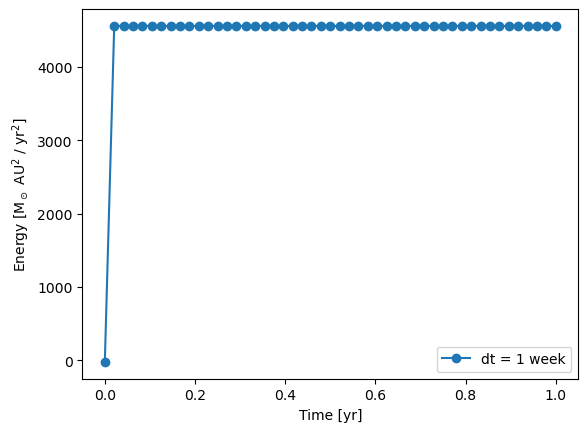

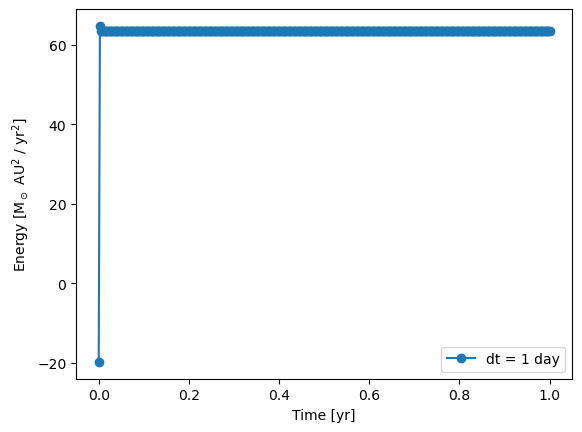

In [11]:
# plot the energies over time for each method
for i, N in enumerate(Ns):
    plt.figure()
    ti, vec, Ei = integrate_orbit(N, e0=0.96)
    plt.plot(ti, Ei, 'o-', label=f'dt = 1 {periods[i]}')

    plt.xlabel('Time [yr]')
    plt.ylabel(r'Energy [M$_\odot$ AU$^2$ / yr$^2$]')
    plt.legend()

For the elliptical orbit, all of the methods do terribly. In fact, the orbits don't even close for any of them. The energy immediately jumps up to a drastically bad value, though again it's not quite as bad for the smaller step sizes.

#### Part 3 - RK4 with Adaptive Step Size

In [12]:
def rk4_adaptive_step(f, x, t, dt, err_tol=1e-5, depth=1):
    # modify the rk4 method to use an adaptive step size
    k1 = f(t, x) * dt
    k2 = dt * f(t + 0.5*dt, x + 0.5*k1)
    k3 = dt * f(t + 0.5*dt, x + 0.5*k2)
    k4 = dt * f(t + dt, x + k3)
    x_tau = x + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    # I use recursion to compute the steps at tau/2, but I don't want those
    # new function calls to themselves call the method on tau/2 unless
    # they fail the error check. So add a depth parameter to conditionally
    # check if we are in a step prior to or after an error check
    if depth == 0:
        # if we are just computing at tau/2 and doing nothing else, just return it
        return x_tau
    elif depth > 0:
        # otherwise, we need to compute the steps at tau/2
        x_tau_2_1 = rk4_adaptive_step(f, x, t, dt/2, depth=0)
        x_tau_2_2 = rk4_adaptive_step(f, x_tau_2_1, t+dt/2, dt/2, depth=0)

    # compute the relative error as the diference between the two steps in position
    err_rel = np.linalg.norm(x_tau_2_2[:2] - x_tau[:2]) / np.linalg.norm(x_tau[:2])

    # propose a new step size based on the error
    dt_new = dt * (err_tol/err_rel)**0.2
    if err_rel < err_tol:
        # if we pass the convergence check, we can increase the step size
        return x_tau_2_2, dt, dt_new
    else:
        # if we fail the convergence check, then try again with the new proposed step
        return rk4_adaptive_step(f, x, t, dt_new, depth=depth+1)

In [13]:
def integrate_orbit_adaptive(N, tmin=0, tmax=1, a0=a0, e0=0, method=rk4_adaptive_step, err_tol=1e-10):
    # set up the initial time step
    dt_new = (tmax - tmin) / N

    # set up the time grid (not a numpy array because we don't know how many steps we'll take)
    t = [0]

    # same for the initial phase vector and energy grids
    vec = initialize_particle(a0, e0).reshape(4, 1)
    Es = [E(vec)]

    while t[-1] < tmax:
        # increment the time until we reach the maximum time

        # update the phase space vector according to our adaptive method
        veci, dt, dt_new = method(rdot_vdot, vec[:,-1], t[-1], dt_new, err_tol=err_tol)

        # the quantity dt is how much we updated the time by in the last step
        t = np.append(t, (t[-1] + dt))
        vec = np.append(vec, veci.reshape(4, 1), axis=1)
        Es = np.append(Es, E(veci))

        # next in the loop, we update the method using the newly proposed time step

    # if the final solution has a t value larger than tmax, then redo that last step using
    # a fixed step size to exactly hit t = tmax
    if t[-1] > tmax:
        delta_tmax = tmax - t[-2]
        t[-1] = tmax
        vec[:,-1], dt, dt_new = method(rdot_vdot, vec[:,-2], t[-2], delta_tmax)
        Es[-1] = E(vec[:,-1])

    return t, vec, Es

Text(0, 0.5, 'Relative Error in Position')

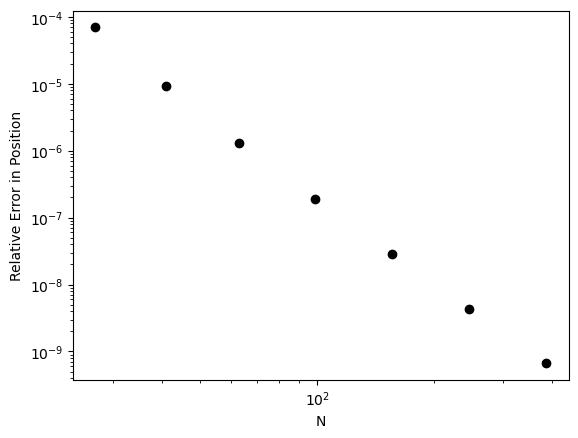

In [14]:
# as a sanity check, try out the integration on a circular orbit

# try out the integration for a variety of error tolerances
err_tols = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
for i, err_tol in enumerate(err_tols):
    ti, veci, _ = integrate_orbit_adaptive(N, e0=0, err_tol=err_tol)

    # calculate the relative error in the final position
    # in this case, calculate the distance between the initial and final positions
    rel_err = np.linalg.norm(veci[:2,0]-veci[:2,-1])
    plt.loglog(len(ti), rel_err, 'o', c='k') # plot the error as a function of N

plt.xlabel('N')
plt.ylabel('Relative Error in Position')

This algorithm seems to parallel (or possibly even slightly beat) the RK4 method with a fixed step size for a circular orbit, which is good to see. let's now do it for the highly elliptical orbit.

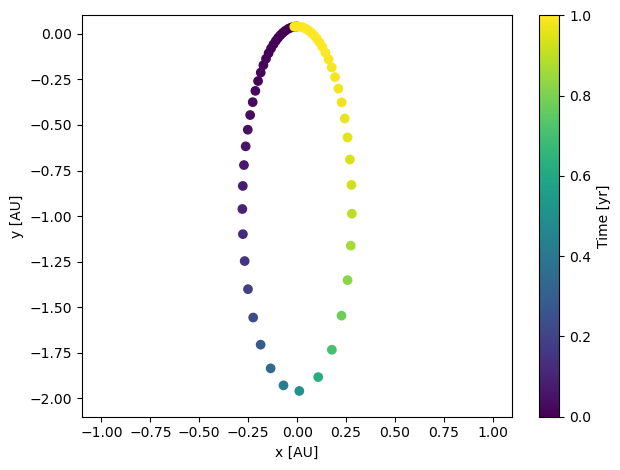

In [15]:
# Plot one orbit to visualize the particle's motion
t, vec, Es = integrate_orbit_adaptive(1000, e0=0.96, err_tol=1e-5, tmax=1)

plt.scatter(vec[0], vec[1], c=t, cmap='viridis')

dr = 1.1
plt.xlim(-dr, dr)
plt.ylim(-1-dr, -1+dr)
plt.colorbar(label='Time [yr]')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.tight_layout()

We can nicely see how the RK4 method takes smaller steps at the points in the orbit where the particle is moving faster, and larger steps in the points in the orbit where it's moving slower. This is the exact kind of behavior that we were looking for!

Text(0, 0.5, 'Time Step [yr]')

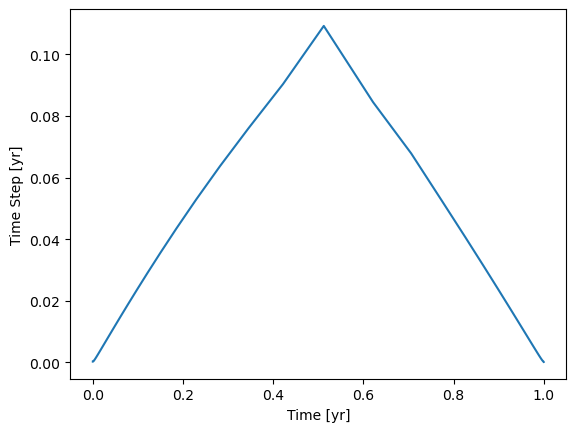

In [16]:
dts = np.diff(t)
plt.plot(t[:-1], dts)
plt.xlabel('Time [yr]')
plt.ylabel('Time Step [yr]')

This plot quantifies what I am saying above - we the step size gets longer, then shorter again.

Text(0, 0.5, 'Energy [M$_\\odot$ AU$^2$ / yr$^2$]')

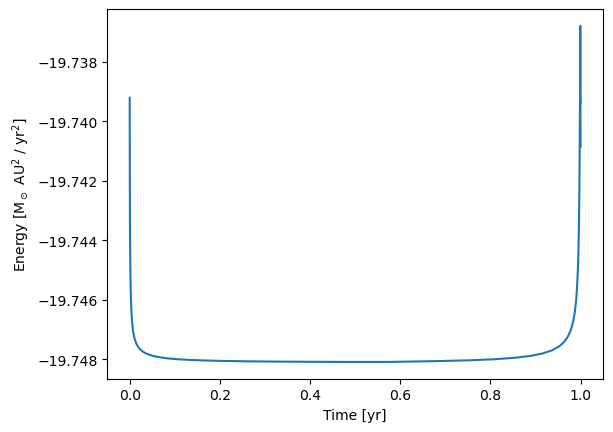

In [17]:
ti, vec, Ei = integrate_orbit_adaptive(N, e0=0.98, err_tol=1e-5)
plt.plot(ti, Ei)
plt.xlabel('Time [yr]')
plt.ylabel(r'Energy [M$_\odot$ AU$^2$ / yr$^2$]')

Energy isn't very well conserved over the course of the orbit, since it varies quite a bit, but comparing the starting and final values, we see that it seems to return a bit closer to the initial value than it would appear at first glance. Still, the energy still changes a non-negligible amount from start to end.

Text(0, 0.5, 'Relative Error in Position')

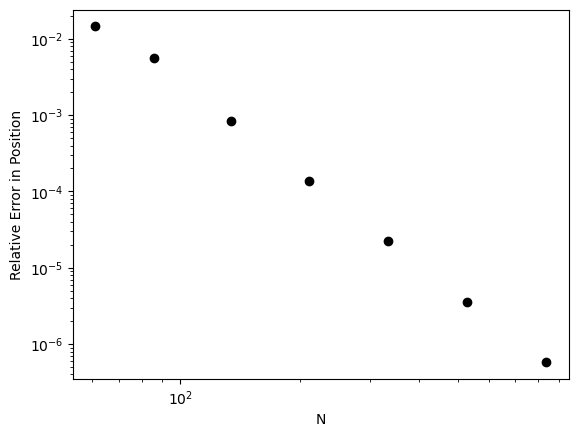

In [18]:
# integrating over elliptical orbit

# try out the integration for a variety of error tolerances
err_tols = [1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
for i, err_tol in enumerate(err_tols):
    ti, veci, _ = integrate_orbit_adaptive(N, e0=0.96, err_tol=err_tol)

    # calculate the relative error in the final position
    # in this case, calculate the distance between the initial and final positions
    rel_err = np.linalg.norm(veci[:2,0]-veci[:2,-1])
    plt.loglog(len(ti), rel_err, 'o', c='k') # plot the error as a function of N

plt.xlabel('N')
plt.ylabel('Relative Error in Position')

Just for fun, we see that decreasing our error tolerance improves the final position error, as expected.

#### Part 4 - Adaptive RK4 on 25-period orbit

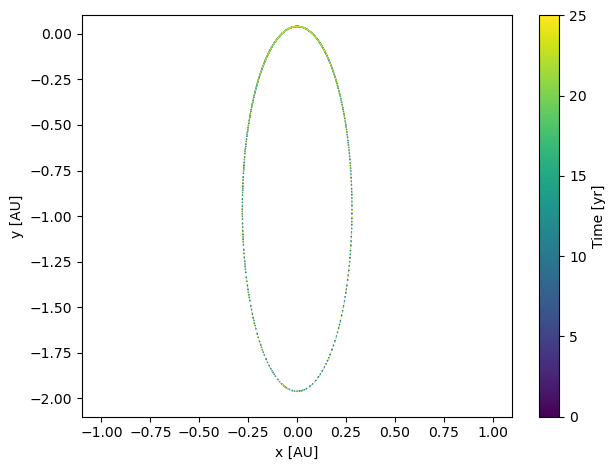

In [19]:
# Plot one orbit to visualize the particle's motion
t, vec, Es = integrate_orbit_adaptive(1000, e0=0.96, err_tol=1e-5, tmax=25)

plt.scatter(vec[0], vec[1], c=t, cmap='viridis', s=1, lw=0)

dr = 1.1
plt.xlim(-dr, dr)
plt.ylim(-1-dr, -1+dr)
plt.colorbar(label='Time [yr]')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.tight_layout()

The orbit appears to stay tightly constrained, at least over 25 orbits. This is a big step up from the non-adaptive method, which couldn't even manage 1.

Text(0, 0.5, 'Time Step [yr]')

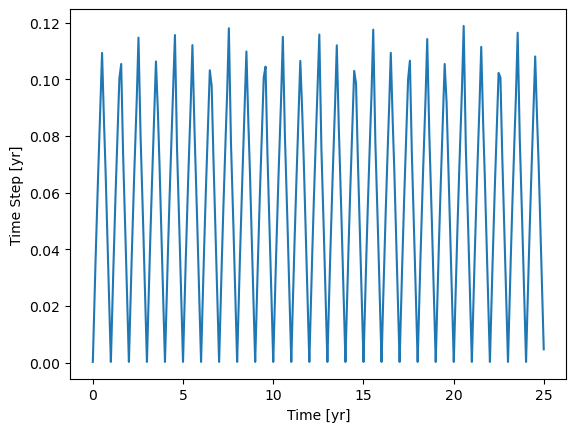

In [20]:
dts = np.diff(t)
plt.plot(t[:-1], dts)
plt.xlabel('Time [yr]')
plt.ylabel('Time Step [yr]')

This plot quantifies what I am saying above - we the step size gets longer, then shorter again.

Text(0, 0.5, 'Energy [M$_\\odot$ AU$^2$ / yr$^2$]')

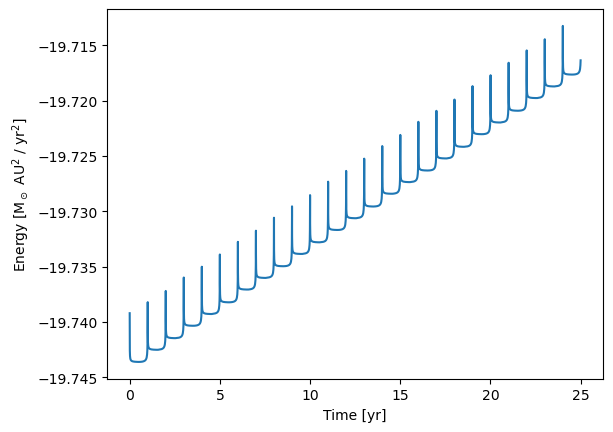

In [21]:
plt.plot(t, Es)
plt.xlabel('Time [yr]')
plt.ylabel(r'Energy [M$_\odot$ AU$^2$ / yr$^2$]')

From before, the energy changes a fair bit throughout the orbit, but ends up roughly where it started. However, in this case, *roughly* isn't quite good enough, since the final energy is consistently larger than the initial energy. This causes the energy to consistently increase over time. This means that this RK4 adaptive method, while potentially useful on short timescales, is not suitable for orbital calculations over any significant length of time.